# Predicting Bike count in Munich (Project Chapter 9 Tabular Modelling Deep Dive)

To get some pratical experience I chose my own project to practice the concepts introduced in Chapter 9 "Tabular Modelling Deep Dive" of the fastai_v2 course. I wanted to share my approach and would be happy if you could point me to errors, misunderstandings or possible improvements.

1. [Goal](#introduction)
2. [Data](#data)
    1. [Get data](#getdata)
    1. [Explore data](#exploredata)
3. [Modelling](#model)
    1. [Random Forest](#rf)
    2. [Neuronal Net](#nn)    
4. [Conclusion and open questions](#conclusion)

## 1. My Goal <a name="introduction"></a>

The city of munich counts the number of bikers on six counting stations throughout munich. They provide those numbers to the public in their open data portal.

Based on this data, can I create a model that predicts the number of bikers for a given day?

## 2. The data <a name="data"></a>

At the momente there are 6 permanent bike counting stations in munich. They count bikes with sensors build into the street. The data can be accessed via the open data portal api. e.g. all currently available datasets can be retrieved with this call: https://www.opengov-muenchen.de/api/3/action/package_search?q=Raddauerz%C3%A4hlstellen&rows=1000

In April 2020 the counting station Kreuther changed. The sensor size approximatly doubled in size. Take this into account for data after 1. april.

More information:

* OpenDataPortal Munich Website (german): https://www.opengov-muenchen.de/dataset?tags=Raddauerz%C3%A4hlstellen
* Info about bike counting stations (Raddauerzählstellen) (german): https://www.opengov-muenchen.de/pages/raddauerzaehlstellen
* API Doku: https://docs.ckan.org/en/ckan-2.5.3/api/
* Analysis of data 2017 & 2018 in german - [„Aufs Radl – Fertig? – Los!“ Ergebnisse der Raddauerzählstellen in München 2017 und 2018 (PDF)](https://www.muenchen.de/rathaus/dam/jcr:9a65625e-952f-470f-b6a1-d4270f4526cb/mb190304.pdf)


### 2.1 Get data <a name="getdata"></a>

In [1]:
import requests
import os
import itertools

In [2]:
r = requests.get('https://www.opengov-muenchen.de/api/3/action/package_search?q=Raddauerz%C3%A4hlstellen&rows=1000')
json = r.json()

In [3]:
#json

In [4]:
def download_csv(url):
    filename = 'data/' + url.rsplit('/',1)[1]
    if os.path.exists(filename):
        print(f'{filename} already exists')
    else:
        r = requests.get(url)
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        with open(filename, 'wb') as f:
            f.write(r.content)
        print(f'{filename} downloaded.')

In [5]:
resources = [[{'name':res['name'], 'url':res['url']} for res in result['resources'] if res['name'] != 'Raddauerzählstellen in München'] for result in json['result']['results']]
resources = list(itertools.chain.from_iterable(resources))

In [6]:
for res in resources:
    download_csv(res['url'])

data/rad20170615min.csv already exists
data/rad201706tage.csv already exists
data/rad20201015min.csv already exists
data/rad202010tage.csv already exists
data/rad20200915min.csv already exists
data/rad202009tage.csv already exists
data/rad20200815min.csv already exists
data/rad202008tage.csv already exists
data/rad20200715min.csv already exists
data/rad202007tage.csv already exists
data/rad20200615min.csv already exists
data/rad202006tage.csv already exists
data/rad20200115min.csv already exists
data/rad202001tage.csv already exists
data/rad20200315min.csv already exists
data/rad202003tage.csv already exists
data/rad20200215min.csv already exists
data/rad202002tage.csv already exists
data/rad20190415min.csv already exists
data/rad201904tage.csv already exists
data/rad20181115min.csv already exists
data/rad201811tage.csv already exists
data/rad20170715min.csv already exists
data/rad201707tage.csv already exists
data/rad20170115min.csv already exists
data/rad201701tage.csv already exists

### 2.2. Explore data

In [7]:
# pip install pandas

In [8]:
import pandas as pd

In [9]:
files = [f for f in os.listdir('data') if os.path.isfile(os.path.join('data', f))]
files.sort()

#### Data complete?
For each month there should be two csv files (15 min und day). Therefore there should 92 files `(3 years * 12 month + 10 (10 for october)) * 2`

In [10]:
len(files) == (3 * 12 + 10) * 2

True

#### How does the data look like?

In [11]:
df_min15 = pd.read_csv('data/rad20201015min.csv')
df_min15

,datum,uhrzeit_start,uhrzeit_ende,zaehlstelle,richtung_1,richtung_2,gesamt
0,2020.10.01,00:00,00:15,Arnulf,2,0,2
1,2020.10.01,00:15,00:30,Arnulf,1,0,1
2,2020.10.01,00:30,00:45,Arnulf,0,0,0
3,2020.10.01,00:45,01:00,Arnulf,0,0,0
4,2020.10.01,01:00,01:15,Arnulf,1,0,1
...,...,...,...,...,...,...,...
17851,2020.10.31,22:45,23:00,Erhardt,5,14,19
17852,2020.10.31,23:00,23:15,Erhardt,8,11,19
17853,2020.10.31,23:15,23:30,Erhardt,5,9,14
17854,2020.10.31,23:30,23:45,Erhardt,5,9,14


In [12]:
df_day = pd.read_csv('data/rad202010tage.csv')
df_day

,datum,uhrzeit_start,uhrzeit_ende,zaehlstelle,richtung_1,richtung_2,gesamt,min-temp,max-temp,niederschlag,bewoelkung,sonnenstunden
0,2020.10.01,00:00,23.59,Arnulf,1738,107,1845,6.5,19.4,0.0,65,8.2
1,2020.10.02,00:00,23.59,Arnulf,1469,89,1558,9.8,18.4,0.0,99,0.9
2,2020.10.03,00:00,23.59,Arnulf,548,37,585,5.1,22.1,2.9,75,2.9
3,2020.10.04,00:00,23.59,Arnulf,821,37,858,4.7,17.3,0.7,73,6.5
4,2020.10.05,00:00,23.59,Arnulf,1048,63,1111,9.0,14.6,4.7,98,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...
181,2020.10.27,00:00,23.59,Erhardt,2289,2213,4502,3.9,11.1,0.0,75,1.5
182,2020.10.28,00:00,23.59,Erhardt,2675,2592,5267,3.5,14.7,2.4,95,1.3
183,2020.10.29,00:00,23.59,Erhardt,1334,1342,2676,8.9,11.2,15.5,94,0.0
184,2020.10.30,00:00,23.59,Erhardt,2167,2142,4309,9.0,14.7,0.0,99,0.6


* Every file contains all counting_stations (zaehlstelle).
* The counts are in three value direction_1 (richtung_1), direction_2 (richtung_2) and total (gesamt)
* The day datasets also contain weather information - min/max temp, sun hours, rain and cloud

In [13]:
# Available counting stations (zaehlstellen):
df_day.zaehlstelle.unique()

array(['Arnulf', 'Kreuther', 'Olympia', 'Hirsch', 'Margareten', 'Erhardt'],
      dtype=object)

In [14]:
# getDataframe of datafiles
# - prefixes - filter used files by prefix e.g. rad2018 for year 2018
# - zaehlstelle - filter by given counting station ()
def getDataframe(prefixes, zaehlstelle: str):
    files = [f for f in os.listdir('data') if os.path.isfile(os.path.join('data', f)) and f.endswith('tage.csv')]
    files = [f for f in files if f.startswith(prefixes)]
    df = pd.concat([pd.read_csv(os.path.join('data', f)) for f in files])
    return df[df.zaehlstelle == zaehlstelle].sort_values(by=['datum'])

In [15]:
df_arnulf = getDataframe(zaehlstelle='Arnulf', prefixes = ('rad2017', 'rad2018', 'rad2019'))

In [16]:
df_arnulf

,datum,uhrzeit_start,uhrzeit_ende,zaehlstelle,richtung_1,richtung_2,gesamt,min-temp,max-temp,niederschlag,bewoelkung,sonnenstunden
0,2017.01.01,00:00:00,23.59,Arnulf,121,14,135,-6.1,2.6,0.0,36,5.9
1,2017.01.02,00:00:00,23.59,Arnulf,362,38,400,-5.4,0.8,3.2,69,0.3
2,2017.01.03,00:00:00,23.59,Arnulf,232,30,262,-2.1,0.6,0.0,85,3.6
3,2017.01.04,00:00:00,23.59,Arnulf,182,25,207,-0.9,1.3,2.2,94,0.0
4,2017.01.05,00:00:00,23.59,Arnulf,193,31,224,-7.1,-0.2,0.0,88,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26,2019.12.27,00:00,23.59,Arnulf,312,30,342,1.7,4.9,4.9,98,0.0
27,2019.12.28,00:00,23.59,Arnulf,337,37,374,-2.1,2.0,0.0,69,3.2
28,2019.12.29,00:00,23.59,Arnulf,253,32,285,-4.8,2.5,0.0,26,7.9
29,2019.12.30,00:00,23.59,Arnulf,550,52,602,-4.4,6.0,0.0,9,8.0


#### Are there missing days?

In [17]:
from datetime import date, timedelta, datetime

def findMissingDays(df):
    dates = df.datum.map(lambda x: datetime.strptime(x, '%Y.%m.%d')).tolist()
    dates.sort()
    d = set(dates[0] + timedelta(x) for x in range((dates[-1] - dates[0]).days))
    return sorted(d - set(dates))

In [18]:
missing = findMissingDays(df_arnulf)
len(missing), missing[0], missing[-1]

(61, Timestamp('2019-06-01 00:00:00'), Timestamp('2019-07-31 00:00:00'))

There are missing days from June to July 2019

#### Plot counts for a month

In [19]:
# pip install matplotlib

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
plt.rcParams['figure.figsize'] = [20, 15]

df = getDataframe(prefixes=('rad2018'), zaehlstelle='Arnulf')

<ipython-input-22-f5cfea7d9034>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.axes()


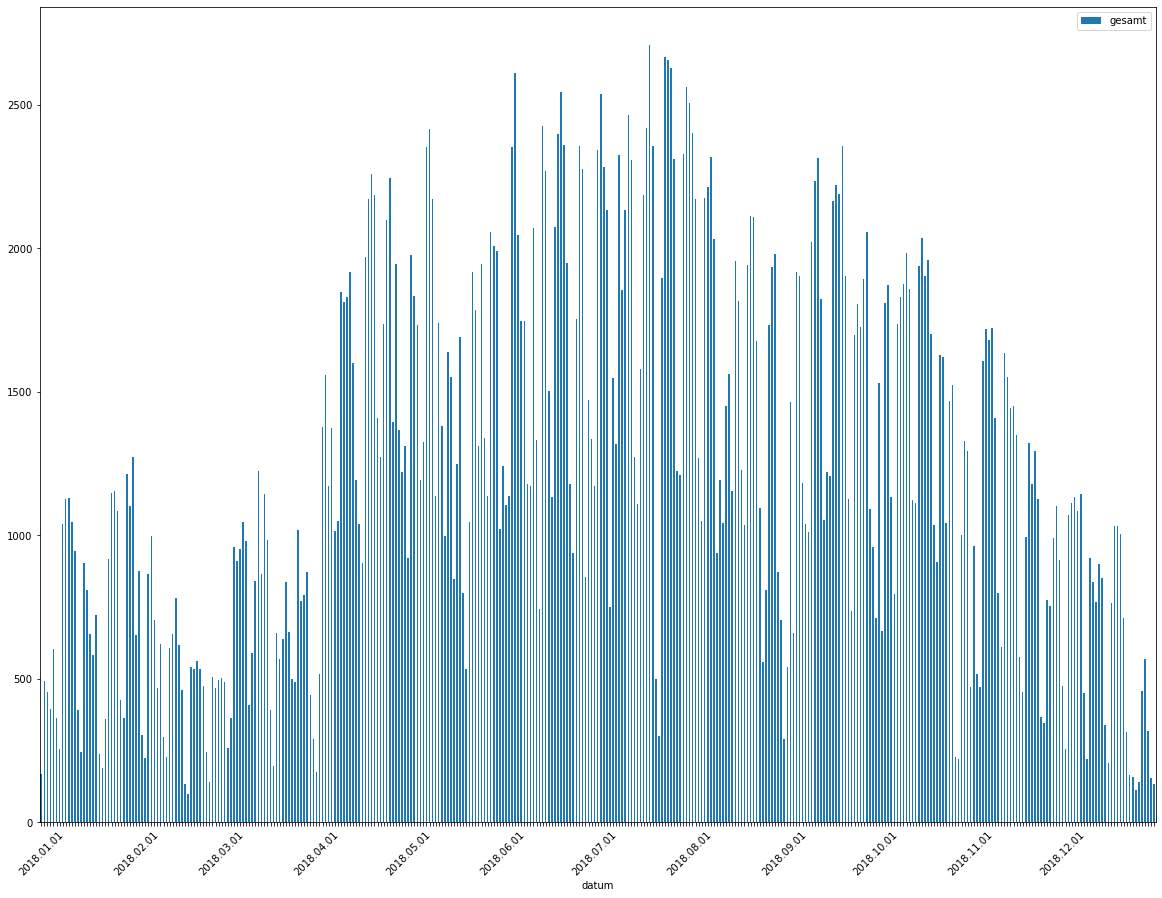

In [22]:
df.plot.bar(x='datum', y='gesamt', rot=45)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
for index, label in enumerate(x_axis.get_ticklabels()):
    if not label.get_text().endswith('01'):
        label.set_visible(False)
plt.show()
plt.close()

## 3. Modelling <a name="model"></a>

I will work with the daily numbers because they already contain the weather information.
I will use the year 2017 & 2018 as training data and 2019 for validation.

### 3.1. Random Forest <a name="rf"></a>

#### Prepare data

In [23]:
# conda install -c fastai -c pytorch fastai

In [24]:
from fastai.tabular.all import *

/opt/conda/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [25]:
df = getDataframe(prefixes=('rad2017', 'rad2018', 'rad2019'), zaehlstelle='Arnulf')
# add date columns like day of week etc. 
df = add_datepart(df, 'datum')
df.head()

,uhrzeit_start,uhrzeit_ende,datumWeek,zaehlstelle,richtung_1,richtung_2,gesamt,min-temp,max-temp,niederschlag,...,datumDay,datumDayofweek,datumDayofyear,datumIs_month_end,datumIs_month_start,datumIs_quarter_end,datumIs_quarter_start,datumIs_year_end,datumIs_year_start,datumElapsed
0,00:00:00,23.59,52,Arnulf,121,14,135,-6.1,2.6,0.0,...,1,6,1,False,True,False,True,False,True,1483228800
1,00:00:00,23.59,1,Arnulf,362,38,400,-5.4,0.8,3.2,...,2,0,2,False,False,False,False,False,False,1483315200
2,00:00:00,23.59,1,Arnulf,232,30,262,-2.1,0.6,0.0,...,3,1,3,False,False,False,False,False,False,1483401600
3,00:00:00,23.59,1,Arnulf,182,25,207,-0.9,1.3,2.2,...,4,2,4,False,False,False,False,False,False,1483488000
4,00:00:00,23.59,1,Arnulf,193,31,224,-7.1,-0.2,0.0,...,5,3,5,False,False,False,False,False,False,1483574400


In [26]:
# drop richtung columns because the are sum up to gesamt value, which we want to predict
df = df.drop(['richtung_1', 'richtung_2'], axis=1)

In [27]:
# Create Tabular Pandas
procs = [Categorify, FillMissing] # processings or transformations
cond = (df.datumYear<2019)
train_idx = np.where(cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

dep_var = 'gesamt' # dependent variable, the number we want to predict

cont, cat = cont_cat_split(df, 1, dep_var=dep_var)
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [28]:
to.show(3)

,uhrzeit_start,uhrzeit_ende,datumWeek,zaehlstelle,datumIs_month_end,datumIs_month_start,datumIs_quarter_end,datumIs_quarter_start,datumIs_year_end,datumIs_year_start,datumElapsed,min-temp,max-temp,niederschlag,bewoelkung,sonnenstunden,datumYear,datumMonth,datumDay,datumDayofweek,datumDayofyear,gesamt
0,00:00:00,23.59,52,Arnulf,False,True,False,True,False,True,1483228800,-6.1,2.6,0.0,36,5.9,2017,1,1,6,1,135
1,00:00:00,23.59,1,Arnulf,False,False,False,False,False,False,1483315200,-5.4,0.8,3.2,69,0.3,2017,1,2,0,2,400
2,00:00:00,23.59,1,Arnulf,False,False,False,False,False,False,1483401600,-2.1,0.6,0.0,85,3.6,2017,1,3,1,3,262


In [29]:
# save
save_pickle((URLs.path()/'../to.pkl'), to)

#### Train Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [31]:
xs,y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [32]:
def rf(xs, y, n_estimators=40, max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators, min_samples_leaf=min_samples_leaf, max_features=max_features, oob_score=True).fit(xs,y)

In [33]:
# root mean square error - penalizes large differences. Would MAE be better as metric?
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [34]:
m = rf(xs, y)

In [35]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(154.958126, 289.336483)

In [36]:
mean_absolute_error(m.predict(xs), y),mean_absolute_error(m.predict(valid_xs), valid_y)

(111.14442994416163, 219.89317067110696)

In [37]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
r_mse(preds.mean(0), valid_y)

289.336483

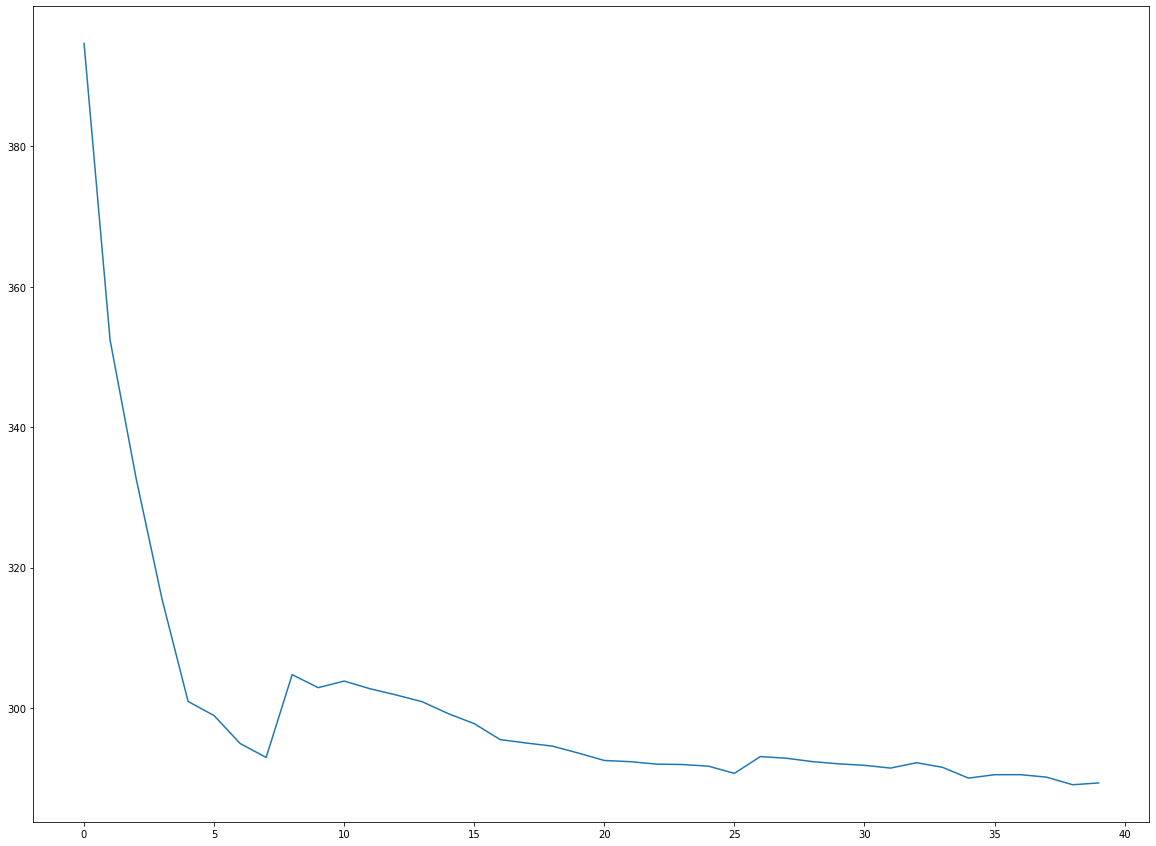

In [38]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

😳 Question: Best result in a previous run seem to be arround 20 not 40 what does that mean?

#### Out of bag error
Good metric to check why our predictions in our training set or better then in our validation set. 108.36805410446944 vs 212.6982400192359

In [39]:
r_mse(m.oob_prediction_, y)

224.584872

😳 Our error in the training set is higher than in the validation set. The example in the fastai book p.302 has an example where the error is lower.

What does this indicate?

#### Prediction confidence

how confident can I be in those predictions? One way is to look at the variance between the trees in the forest. Smaller is better.

In [40]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
print(preds.shape) # 40 trees, with 304 predictions for each day
preds_std = preds.std(0) # standard deviation
preds_std[:20]

(40, 304)


array([232.6595305 , 222.07003864, 263.79652153, 168.79506174,
       129.93735903, 118.76168087, 232.75179387, 226.07838511,
       158.75769198, 242.59344668, 187.0516953 , 120.20898634,
       120.64251801, 156.15777875, 253.39824849, 245.51058203,
       212.6836732 , 240.54123105, 195.51916627, 184.48904677])

#### Feature importance

Which feature are most important?

In [41]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
12,max-temp,0.327027
19,datumDayofweek,0.203813
11,min-temp,0.175878
15,sonnenstunden,0.145585
14,bewoelkung,0.033576
13,niederschlag,0.029997
20,datumDayofyear,0.027678
2,datumWeek,0.027521
10,datumElapsed,0.014604
18,datumDay,0.007461


Most important features are max-temp followed by day of week. Seems reasonable to me. e.g. workdays vs weekdays and cold days vs warm days.

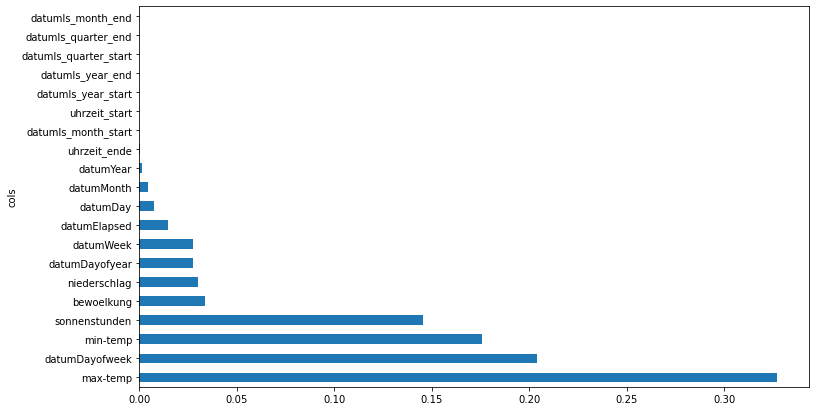

In [42]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:20]);

#### Remove unimportant features

In [43]:
to_keep =fi[fi.imp > 0.005].cols
len(to_keep)

10

In [44]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [45]:
m = rf(xs_imp, y)
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(156.509858, 288.713533)

😳 Got worse in comparison to prev run: 151.42499, 285.167373. But the removed columns shouldn't be important e.g. uhrzeit_start/end is always the same.

#### Redundant features

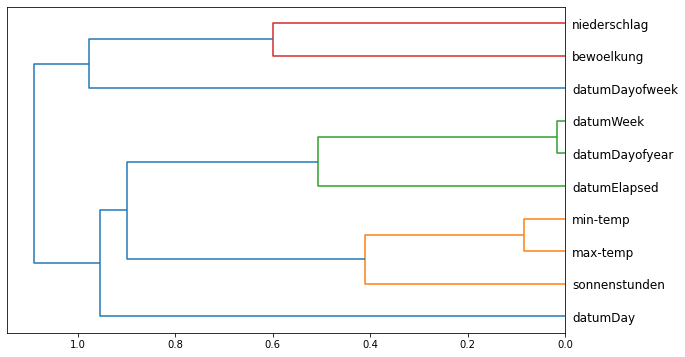

In [46]:
from scipy.cluster import hierarchy as hc

def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()
    
cluster_columns(xs_imp)

In [47]:
xs_imp.head()

,max-temp,datumDayofweek,min-temp,sonnenstunden,bewoelkung,niederschlag,datumDayofyear,datumWeek,datumElapsed,datumDay
0,2.6,6,-6.1,5.9,36,0.0,1,52,1,1
1,0.8,0,-5.4,0.3,69,3.2,2,1,2,2
2,0.6,1,-2.1,3.6,85,0.0,3,1,3,3
3,1.3,2,-0.9,0.0,94,2.2,4,1,4,4
4,-0.2,3,-7.1,0.0,88,0.0,5,1,5,5


month and day of year are close, makes sense both indicate the "season" or the progress into the year.
Will keep it for now.

#### Waterfall Chart

In [51]:
#!pip install treeinterpreter
#!pip install waterfallcharts

In [52]:
from treeinterpreter import treeinterpreter
row = valid_xs_imp.iloc[:1]
prediction,bias,contributions = treeinterpreter.predict(m, row.values)
prediction[0], bias[0], contributions[0].sum()

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


(array([692.80906622]), 1173.3243835616438, -480.5153173436342)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.8/site-packages/matplotlib/pyplot.py'>

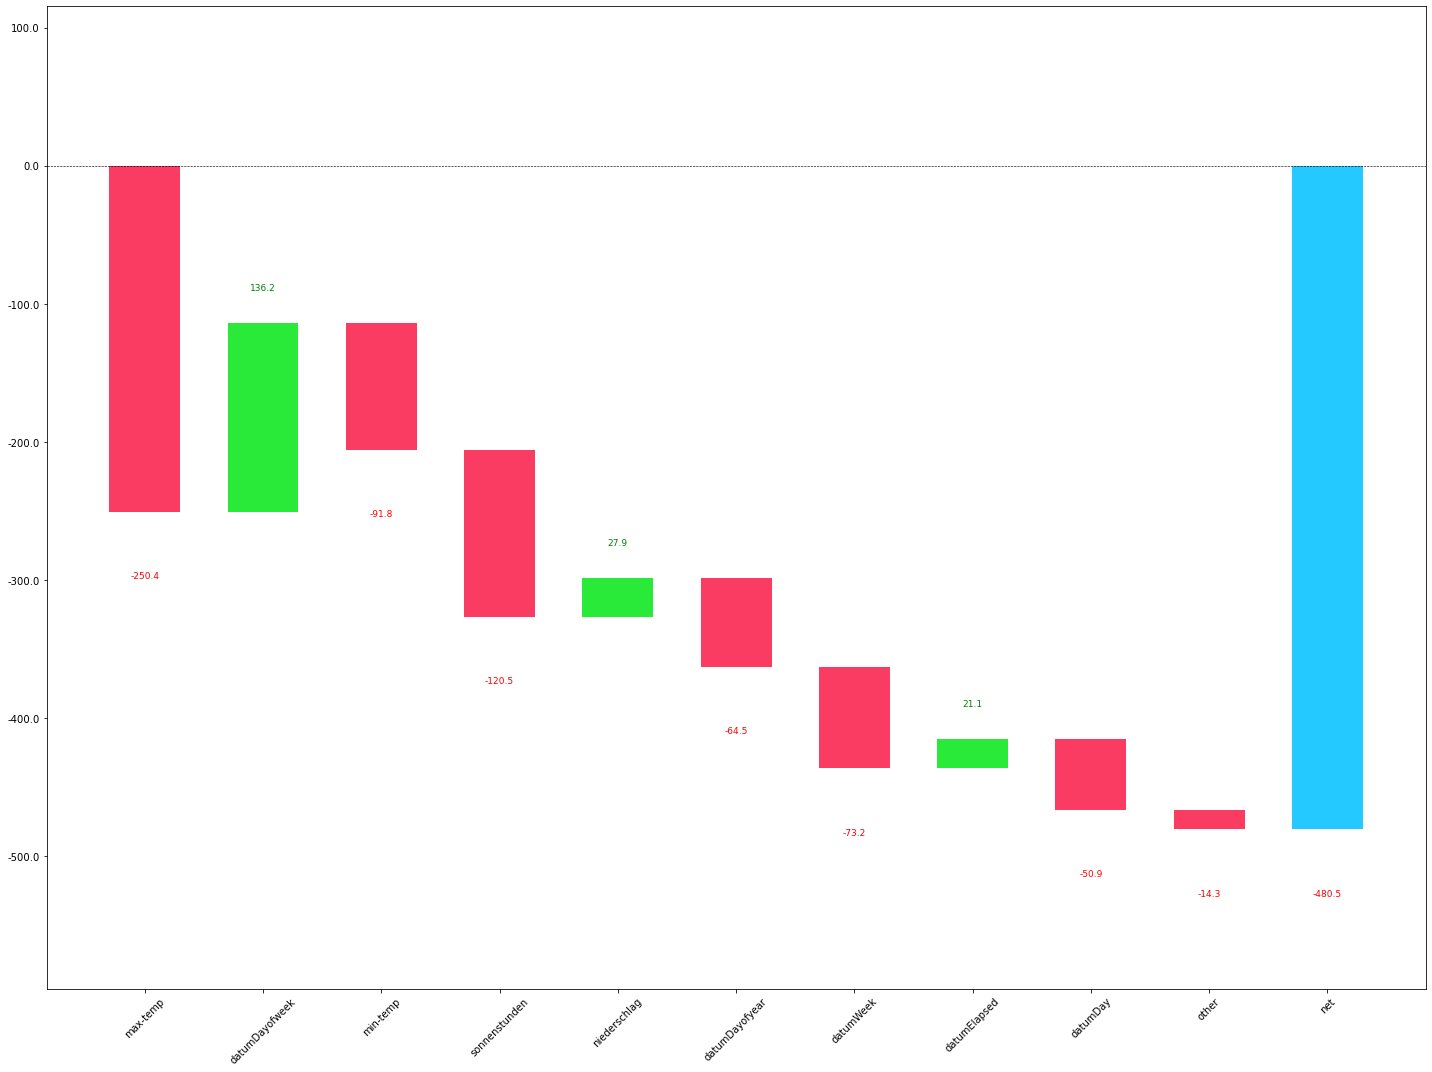

In [53]:
import waterfall_chart
waterfall_chart.plot(valid_xs_imp.columns, contributions[0], threshold=0.08, rotation_value=45)

Indicates the importance of different features for the prediction.

#### Out of domain data

In [54]:
df_dom = pd.concat([xs_imp, valid_xs_imp])
is_valid = np.array([0]*len(xs_imp) + [1]*len(valid_xs_imp))

In [55]:
# RandomForest to decide if value is in train oder valid set.
m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
8,datumElapsed,0.964678
2,min-temp,0.013942
0,max-temp,0.008985
6,datumDayofyear,0.004895
3,sonnenstunden,0.002584
4,bewoelkung,0.002164


By extracting the most important features which seperate train from validation set we find feature which we could drop.

In [56]:
xs_final = xs_imp.drop('datumElapsed', axis=1)
valid_xs_final = valid_xs_imp.drop('datumElapsed', axis=1)
m = rf(xs_final, y)
print(f'without out of dom: {m_rmse(m, valid_xs_final, valid_y)}')

without out of dom: 289.923949


😳 Got worse again.

### Summary of RandomForest

In [57]:
m = rf(xs, y)
print(f'orig: {m_rmse(m, valid_xs, valid_y)}')
m = rf(xs_imp, y)
print(f'imp: {m_rmse(m, valid_xs_imp, valid_y)}')
m = rf(xs_imp.drop('datumElapsed',axis=1), y)
print(f'without out of dom: {m_rmse(m, valid_xs_imp.drop("datumElapsed",axis=1), valid_y)}')

orig: 288.724649
imp: 287.663645
without out of dom: 282.989479


#### less trees

In [58]:
m = rf(xs, y, 25)
print(f'orig: {m_rmse(m, valid_xs, valid_y)}')
m = rf(xs_imp, y, 25)
print(f'imp: {m_rmse(m, valid_xs_imp, valid_y)}')
m = rf(xs_imp.drop('datumElapsed',axis=1), y, 25)
print(f'without out of dom: {m_rmse(m, valid_xs_imp.drop("datumElapsed",axis=1), valid_y)}')

orig: 300.396946
imp: 286.712003
without out of dom: 283.142368


#### Open questions

😳 Results change on every rerun. Therfore: How comparable are the results with the different changes then? 

Should I fix a seed for the RandomForest, is this possible?

### 3.1. Neural Net <a name="nn"></a>

Let's try it with a neural net

In [59]:
df_nn = getDataframe(zaehlstelle='Arnulf', prefixes = ('rad2017', 'rad2018', 'rad2019'))
df_nn = add_datepart(df_nn, 'datum')
df_nn = df_nn[list(xs_final.columns) + [dep_var]]
df_nn

,max-temp,datumDayofweek,min-temp,sonnenstunden,bewoelkung,niederschlag,datumDayofyear,datumWeek,datumDay,gesamt
0,2.6,6,-6.1,5.9,36,0.0,1,52,1,135
1,0.8,0,-5.4,0.3,69,3.2,2,1,2,400
2,0.6,1,-2.1,3.6,85,0.0,3,1,3,262
3,1.3,2,-0.9,0.0,94,2.2,4,1,4,207
4,-0.2,3,-7.1,0.0,88,0.0,5,1,5,224
...,...,...,...,...,...,...,...,...,...,...
26,4.9,4,1.7,0.0,98,4.9,361,52,27,342
27,2.0,5,-2.1,3.2,69,0.0,362,52,28,374
28,2.5,6,-4.8,7.9,26,0.0,363,52,29,285
29,6.0,0,-4.4,8.0,9,0.0,364,1,30,602


In [60]:
cont_nn, cat_nn = cont_cat_split(df_nn, max_card=9000, dep_var=dep_var)

In [61]:
cont_nn, cat_nn

(['max-temp', 'min-temp', 'sonnenstunden', 'niederschlag'],
 ['datumDayofweek', 'bewoelkung', 'datumDayofyear', 'datumWeek', 'datumDay'])

In [62]:
df_nn[cat_nn].nunique()

datumDayofweek      7
bewoelkung         81
datumDayofyear    365
datumWeek          52
datumDay           31
dtype: int64

In [63]:
df_nn=df_nn.astype('float')

procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat_nn, cont_nn, splits=splits, y_names=dep_var)

In [64]:
dls = to_nn.dataloaders()
y = to_nn.train.y
y.min(), y.max()

(29.0, 2707.0)

In [65]:
learn = tabular_learner(dls, y_range=(29,2707), layers=[500,250], n_out=1, loss_func=F.mse_loss)

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=0.0008317637839354575)

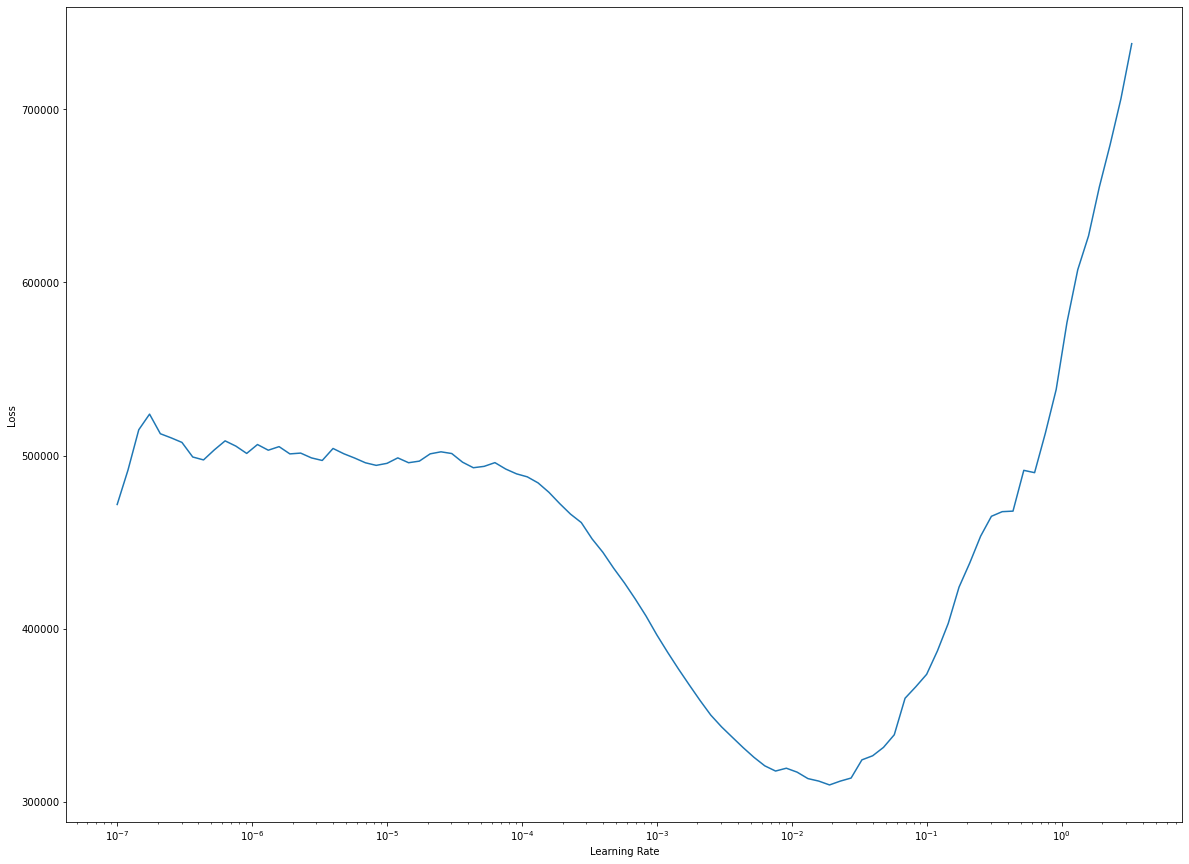

In [66]:
learn.lr_find()

In [67]:
learn.fit_one_cycle(20, 1e-2)

epoch,train_loss,valid_loss,time
0,264181.031250,243105.765625,00:00
1,180762.484375,206665.828125,00:00
2,142475.546875,219365.953125,00:00
3,118528.765625,140491.531250,00:00
4,99783.062500,131595.921875,00:00
5,89932.515625,104212.734375,00:00
6,77307.398438,95556.328125,00:00
7,65479.136719,104474.656250,00:00
8,55602.527344,93334.187500,00:00
9,48797.558594,94594.617188,00:00


In [68]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

289.051398

Is better than the random forest

## 4. Conclusion <a name="conclusion"></a>

### Are these models helpful?

I tried two approaches RandomForest and a Neuronal Net and both seem to work in general, but I still have no real feeling if the models are helpful and what the RSME (RootMeanSquaredError) means for the quality of my model in general. Are those good models that would be helpful?

Should I use another metric?
Are there other metrics besided RSME (RootSquareMeanError) that would make it easier for me to grasp the performance of my model? Should I maybe use a relative metric? e.g. a percentage Metric? or would MeanAbsoluteError help me?
The OOB score is relative from 0 (bad) to 1 (good). It was arround 0.88. Does that mean it is an okay model?

Or does the real value of the predictions only gets visible when I would have a real use case in which they are used? e.g. is an value 100 below the real value helpful for traffic planners?

### RandomForest

* Results change on every rerun. Therfore: How comparable are the results with the different changes then? Should I fix a seed for the RandomForest, is this possible?
* What does it mean if the predictions get worse with more trees?


### Future Steps

* I really like the waterfall chart for the RandomForest which shows which influence different features have. Is there something similiar for a neural net? e.g. like the visualisation of CNN Layers for image classification
* Add bavarian holidays to the data
* Use not only one counting station but the total of all six
* Use datasets where weekdays and weekends are seperated. Could I train a "Should I bike or take the bus?"-Model on this?
 

### Use different Metrics

In [74]:
rf_m = rf(xs_final, y)
rf_preds = rf_m.predict(valid_xs_final)

nn_preds, nn_y = learn.get_preds()

In [75]:
#### Root Mean Squared Error (RMSE)
print(r_mse(rf_preds, valid_y))
print(r_mse(nn_preds, nn_y))

284.392782
289.051398


In [76]:
from fastai import metrics

#### Root Mean Squared Error (RMSE)

In [77]:
# Root Mean Squared Error (RMSE)
print(r_mse(rf_preds, valid_y))
print(r_mse(nn_preds, nn_y))

284.392782
289.051398


#### Mean absolute error (MAE)

In [82]:
# Mean absolute error (MAE)
def mae(preds, y): return np.abs(preds - y).mean()

print(mae(rf_preds, valid_y))
print(mae(nn_preds, nn_y))

216.78254935967226
tensor(208.8528)


#### Mean absolute percentage error (MAPE)

In [83]:
# Mean absolute percentage error (MAPE)
def mape(preds, y): return np.abs((preds - y)/preds).mean()

print(mape(rf_preds, valid_y))
print(mape(nn_preds, nn_y))

0.24172575828170467
tensor(0.2357)


#### normalized Mean Absolute Error / nMAE

In [84]:
def nmae(preds, y): return np.abs((preds - y)).mean() / np.abs(preds).mean()

print(nmae(rf_preds, valid_y))
print(nmae(nn_preds, nn_y))

0.20988577184371965
tensor(0.1982)


# Part 2 Improvements

## Better visualize results in plots

In [103]:
valid_xs.iloc[0].datumYear, valid_xs.iloc[0].datumMonth, valid_xs.iloc[0].datumDay

(2019.0, 1.0, 1.0)

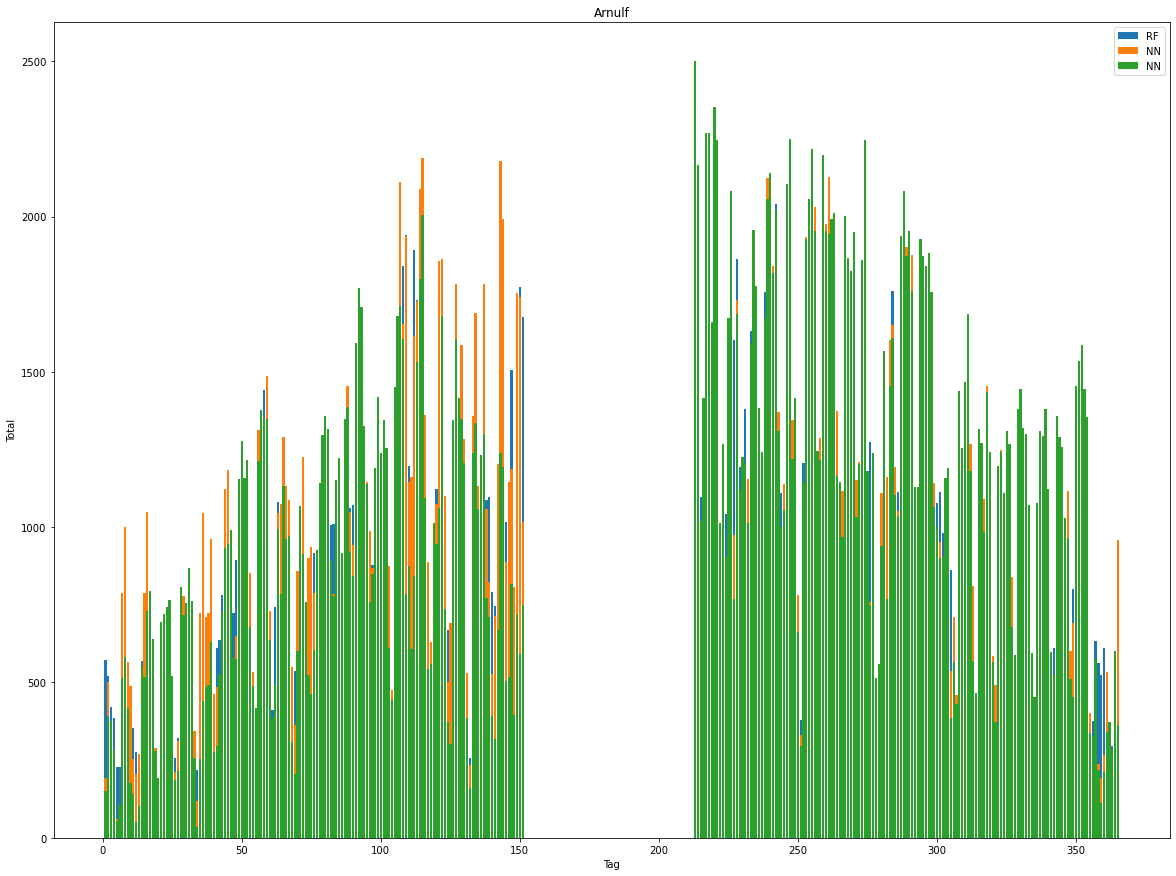

In [173]:
plt.bar(valid_xs['datumDayofyear'], rf_preds, label='RF')
plt.bar(valid_xs['datumDayofyear'], nn_preds, label='NN')
plt.bar(valid_xs['datumDayofyear'], valid_y, label='NN')
plt.xlabel('Tag')
plt.ylabel('Total')
plt.title("Arnulf")
plt.legend()

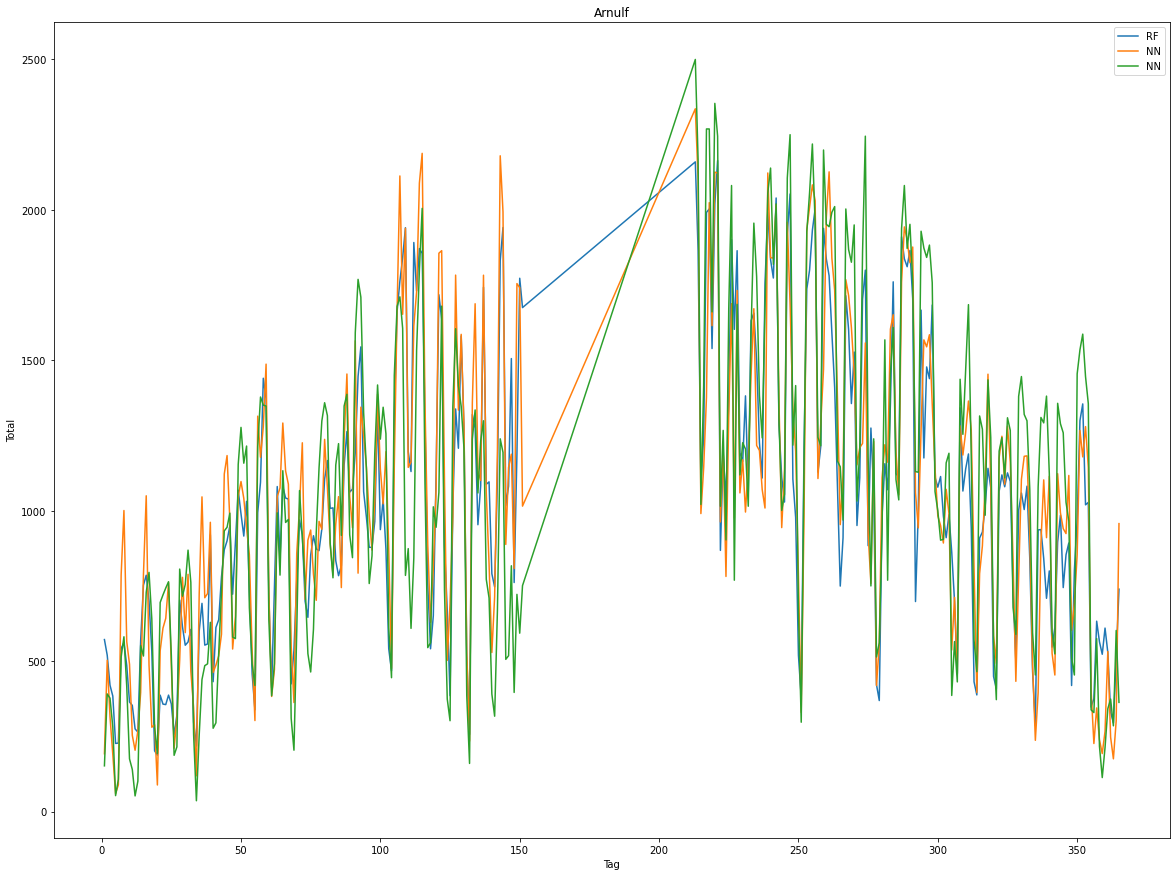

In [174]:
s = 0
n = 365
plt.plot(valid_xs['datumDayofyear'][s:n], rf_preds[s:n], label='RF')
plt.plot(valid_xs['datumDayofyear'][s:n], nn_preds[s:n], label='NN')
plt.plot(valid_xs['datumDayofyear'][s:n], valid_y[s:n], label='NN')
plt.xlabel('Tag')
plt.ylabel('Total')
plt.title("Arnulf")
plt.legend()

In [175]:
valid_xs_final.iloc[90:100]

,max-temp,datumDayofweek,min-temp,sonnenstunden,bewoelkung,niederschlag,datumDayofyear,datumWeek,datumDay
0,15.900000,0,5.3,11.3,21,0.0,91,14,1
1,21.299999,1,3.9,9.2,95,0.0,92,14,2
2,20.900000,2,4.8,6.5,84,0.0,93,14,3
3,12.200000,3,2.9,5.8,84,0.0,94,14,4
4,9.300000,4,3.3,1.0,79,0.0,95,14,5
5,16.799999,5,5.2,8.4,79,0.0,96,14,6
6,16.500000,6,5.0,9.1,79,0.0,97,14,7
7,11.500000,0,8.2,0.0,99,0.9,98,15,8
8,16.600000,1,8.5,3.2,95,0.0,99,15,9
9,12.000000,2,8.0,0.0,96,1.1,100,15,10


In [176]:
len(valid_y.loc[lambda valid_y: valid_y < 200]), len(y.loc[lambda y: y < 200])

(12, 35)

In [177]:
df_2018 = getDataframe(prefixes=('rad2018'), zaehlstelle='Arnulf')
df_2018 = add_datepart(df_2018, 'datum')

In [178]:
df_2017 = getDataframe(prefixes=('rad2017'), zaehlstelle='Arnulf')
df_2017 = add_datepart(df_2017, 'datum')

In [180]:
df_2020 = getDataframe(prefixes=('rad2020'), zaehlstelle='Arnulf')
df_2020 = add_datepart(df_2020, 'datum')

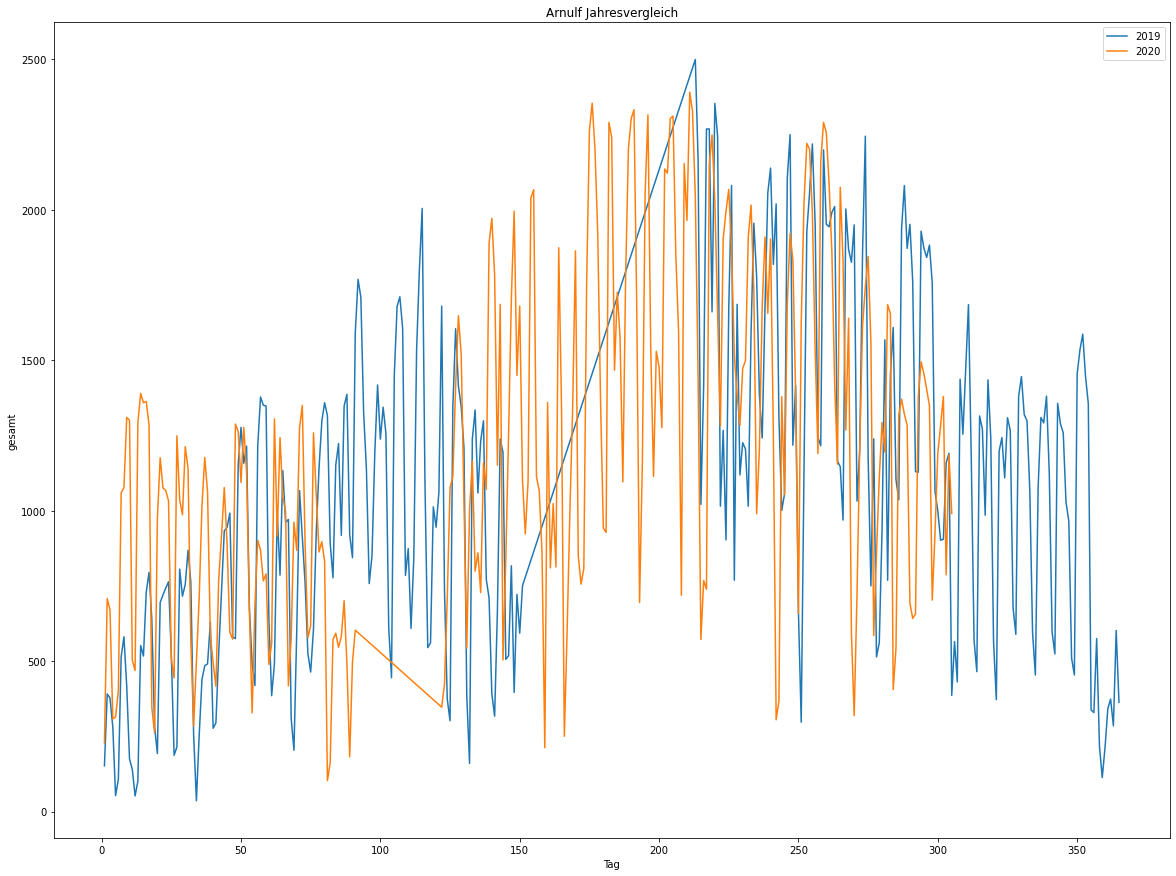

In [213]:
s = 0
n = 304
#plt.plot(valid_xs['datumDayofyear'][s:n], rf_preds[s:n], label='RF')
#plt.plot(valid_xs['datumDayofyear'][s:n], nn_preds[s:n], label='NN')
#plt.plot(df_2017['datumDayofyear'][s:n], df_2017['gesamt'][s:n], label='2017')
#plt.plot(df_2018['datumDayofyear'][s:n], df_2018['gesamt'][s:n], label='2018')
plt.plot(valid_xs['datumDayofyear'][s:n], valid_y[s:n], label='2019')
plt.plot(df_2020['datumDayofyear'][s:n], df_2020['gesamt'][s:n], label='2020')
plt.xlabel('Tag')
plt.ylabel('gesamt')
plt.title("Arnulf Jahresvergleich")
plt.legend()

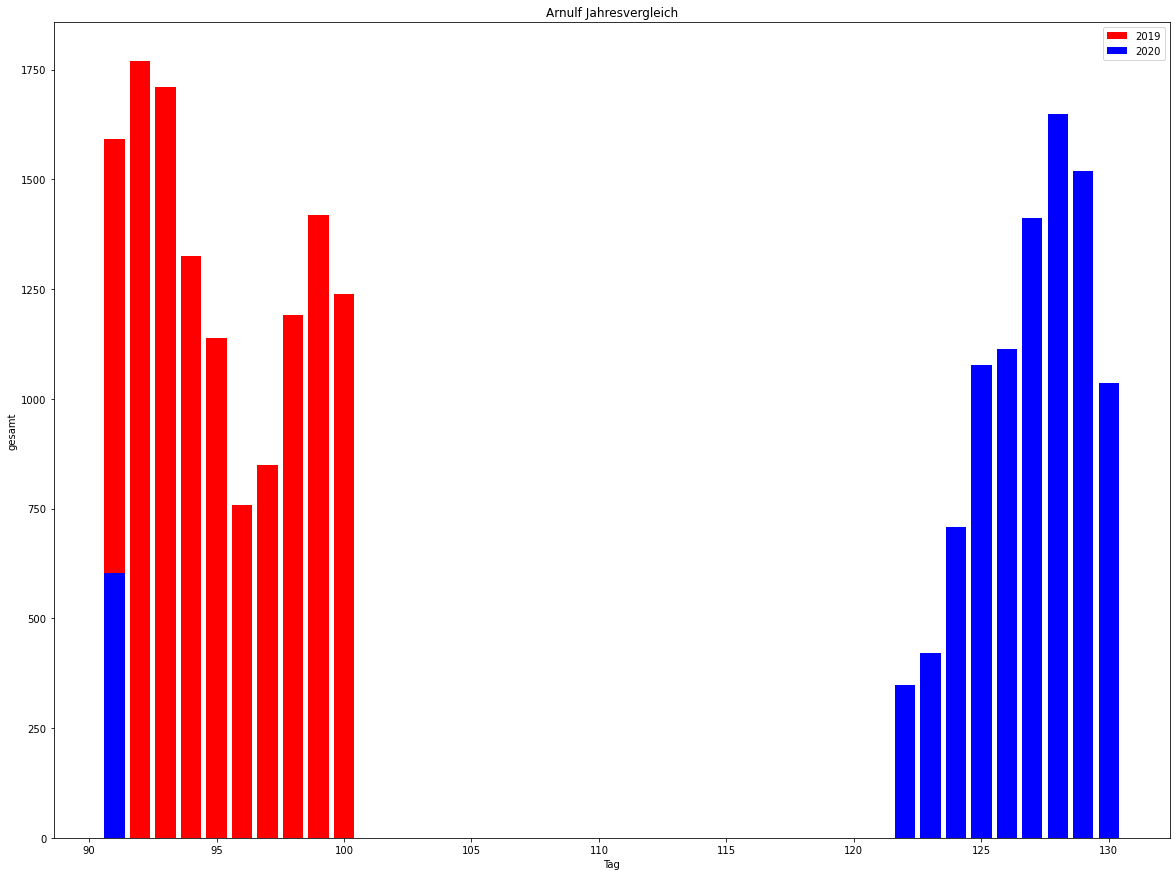

In [229]:
import numpy.ma as ma

s = 90
n = 100

y1 = valid_y[s:n].to_numpy()
y2 = df_2020['gesamt'][s:n].to_numpy()

x1 = valid_xs['datumDayofyear'][s:n].to_numpy()
x2 = df_2020['datumDayofyear'][s:n].to_numpy()

mask1 = ma.where(y1>=y2)
mask2 = ma.where(y2>=y1)

plt.bar(x1[mask1], y1[mask1], color='r', label='2019')
plt.bar(x2, y2, color='b', label='2020')
plt.bar(x1[mask2], y1[mask2], color='r')
plt.xlabel('Tag')
plt.ylabel('gesamt')
plt.title("Arnulf Jahresvergleich")
plt.legend()